# Building A Handwritten Digits Classifier
---

For this particular project, we will try and use deep learning to identify handwritten digits. Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. This is due to:
1. Each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.

2. Images are often downsampled to lower resolutions and transformed to grayscale (no color). This is a limitation of compute power unfortunately. 

3. The features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression.

Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process. 

### Prerequisites

In [1]:
#Importing the modules
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Matplotlib settings
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
#Importing the images
digits=load_digits()

#Looking at the keys in the dataset
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
#Creating a series of the actual result
labels = pd.Series(digits['target'])

#Creating a dataframe of the pattern
data = pd.DataFrame(digits['data'])
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


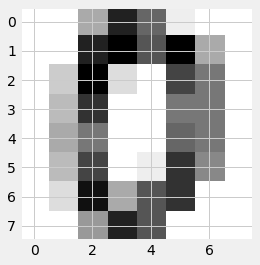

In [4]:
#Previewing one of the image
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

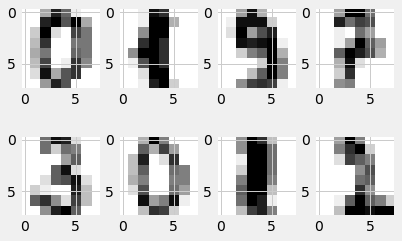

In [5]:
#Previewing sample imagess
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

### K-nearest neighbor
Linear and logistic regression assume linearity between input features and the output. Since k-nearest neighbor makes no such assumption, we can use to capture non-linearity of data. k-nearest neighbor compares every training observation with the test feature and chooses the closest match. So, let's use the KNeighborClassifer. We will be using 4 folds with shuffle on and random state 2 to create a repeatable pattern.

In [6]:
#Importing the library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,cross_val_score

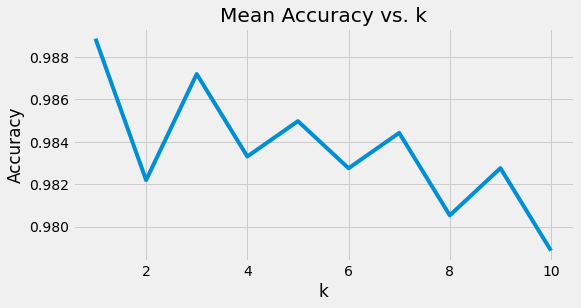

In [7]:
#Performing 4-fold cross validation
kf = KFold(4, shuffle=True, random_state=2)

#Cross validation
k_values = 10
knn_acc = []

for k in range(1,k_values+1):
    knn = KNeighborsClassifier(k)
    accs = cross_val_score(knn, data, labels,cv=kf)
    acc = np.mean(accs)
    knn_acc.append(acc)
    
# plot a line graph
plt.figure(figsize=(8,4))
plt.plot(range(1,k_values+1), knn_acc)
plt.title("Mean Accuracy vs. k")
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

As we can see from the graph above, the K-nearest neighbor model has the highest mean accuracy when k=1, the accuracy is close to 0.989.

### Single Hidden Layer Neural Network
There are a few downsides to using k-nearest neighbors:

- high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
- no model representation to debug and explore

Let's now try a neural network with a single hidden layer.

In [8]:
#Creating a function to test the accuracy of neural network
def nn(n,kf):
    mlp = MLPClassifier(hidden_layer_sizes=n)
    accs = cross_val_score(mlp, data, labels,cv=kf)
    acc = np.mean(accs)
    return acc

In [9]:
#Import the library
from sklearn.neural_network import MLPClassifier

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

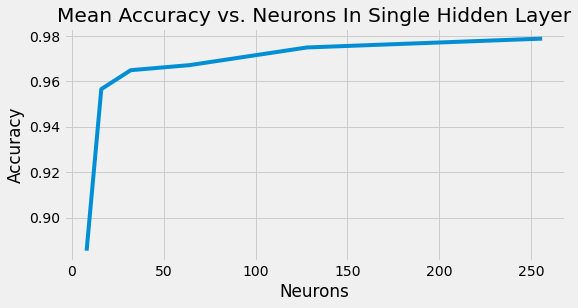

In [10]:
#Setting the single layer neurons
hidden_layer_neurons = [(8,),
                        (16,),
                        (32,),
                        (64,),
                        (128,),
                        (256,)]

#Cross fold
mlp_acc=[]

for i in hidden_layer_neurons:
    mlp_acc.append(nn(i,kf))

x = [i[0] for i in hidden_layer_neurons]

#Plot a line graph
plt.figure(figsize=(8,4))
plt.plot(x, mlp_acc)
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")
plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.show()

After comparing the accuracy of K-nearest neighbor and Single Layer Neural Network, it can be seen that the former (with k=1) is much more accurate then the latter (with 256 neuron and a single hidden layer). Since we probably using neural network, we will investigate further by using two hidden layers. 

### Two Hidden Layers Neural Network

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

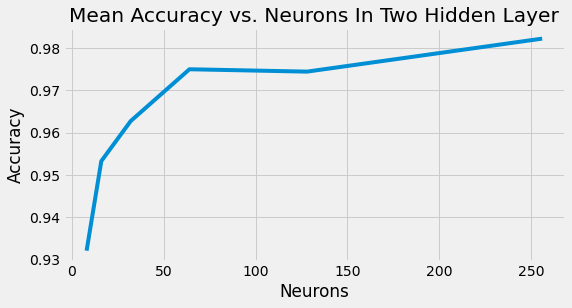

In [11]:
#Setting the two layer neurons
nn_two_neurons = [(8,8),
                  (16,16),
                  (32,32),
                  (64,64),
                  (128,128),
                  (256,256)]

#Cross validation
twonn_acc=[]

for i in nn_two_neurons:
    twonn_acc.append(nn(i,kf))

x = [i[0] for i in nn_two_neurons]

#Plot a line graph
plt.figure(figsize=(8,4))
plt.plot(x, twonn_acc)
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layer")
plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.show()

With the two hidden layered neural network model with 256 neurons for each layer, the accuracy using the 4 fold test improves from 0.97 to 0.98 accuracy. Using 4-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.

### Three Hidden Layers Neural Network
We'll try using three hidden layers and observe if it improves the model's accuracy.

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

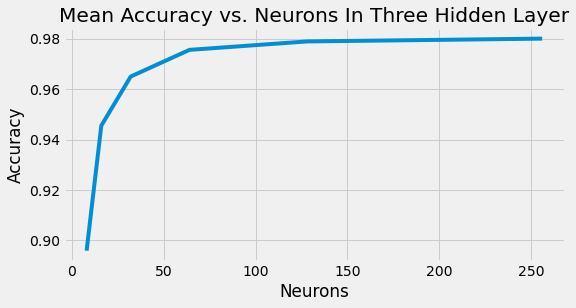

In [12]:
#Setting the three layer neurons
nn_three_neurons = [(8,8,8),
                        (16,16,16),
                        (32,32,32),
                        (64,64,64),
                        (128,128,128),
                        (256,256,256)]

#Cross validation
threenn_acc=[]

for i in nn_three_neurons:
    threenn_acc.append(nn(i,kf))

x = [i[0] for i in nn_three_neurons]

#Plot a line graph
plt.figure(figsize=(8,4))
plt.plot(x, threenn_acc)
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layer")
plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.show()

When training a neural network with three hidden layers and testing it with 4-Fold validation, the model's performance has decreased. It might be due to overfitting. Let's try 6-Fold Validation with 3 hidden layers to see just to double check if the conclusion holds.

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

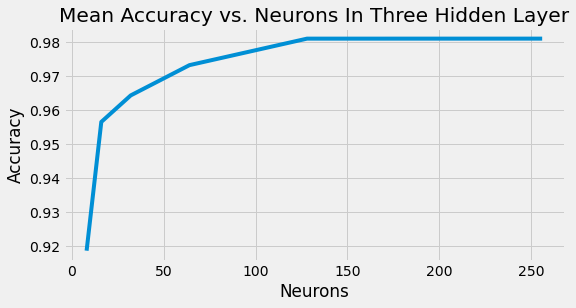

In [13]:
#Setting the new cross validation with k=6
new_kf=kf = KFold(6, shuffle=True, random_state=2)

#Cross validation
nthreenn_acc=[]

for i in nn_three_neurons:
    nthreenn_acc.append(nn(i,new_kf))

x = [i[0] for i in nn_three_neurons]

#Plot a line graph
plt.figure(figsize=(8,4))
plt.plot(x, nthreenn_acc)
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layer")
plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.show()

We can see that with 6 folds, the accuracy increases, thus the three-layer 4 folds result might be due to overfitting.

### Overall Comparison

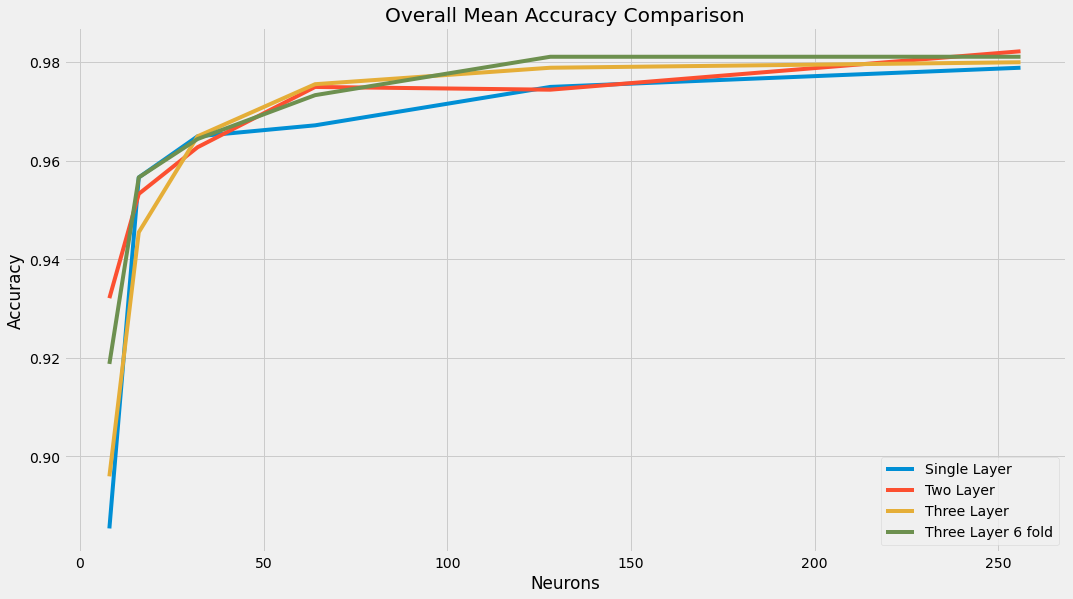

In [14]:
#Plot a line graph
plt.figure(figsize=(16,9))
plt.plot(x, mlp_acc,label='Single Layer')
plt.plot(x, twonn_acc,label='Two Layer')
plt.plot(x, threenn_acc,label='Three Layer')
plt.plot(x, nthreenn_acc,label='Three Layer 6 fold')
plt.title("Overall Mean Accuracy Comparison")
plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

After comparing all of the neural network model, we can see that the highest average accuracy is achieved by the 3 layered neural network with 256 neurons on each layer. That being said, the result of our neural network model is still less than the average accuracy of the K-nearest neighbor model.